# Data Analyst & Data Engineer

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
# Download latest version
path = kagglehub.dataset_download("lucasgreenwell/depression-anxiety-stress-scales-responses")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/depression-anxiety-stress-scales-responses


In [ ]:
data_file_path = f"{path}/data.csv"

df = pd.read_csv(data_file_path, sep='\t')
df.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


In [ ]:
df.info()
df.shape
print("Header Kolom : ", df.columns.to_list())
print("Jumlah Kolom : ", len(df.columns))
print("Jumlah Responden : ", len(df))
print("Jumlah Data Kosong Keseluruhan : ", len(df[df.isnull().any(axis=1)]))
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Columns: 172 entries, Q1A to major
dtypes: int64(170), object(2)
memory usage: 52.2+ MB
Header Kolom :  ['Q1A', 'Q1I', 'Q1E', 'Q2A', 'Q2I', 'Q2E', 'Q3A', 'Q3I', 'Q3E', 'Q4A', 'Q4I', 'Q4E', 'Q5A', 'Q5I', 'Q5E', 'Q6A', 'Q6I', 'Q6E', 'Q7A', 'Q7I', 'Q7E', 'Q8A', 'Q8I', 'Q8E', 'Q9A', 'Q9I', 'Q9E', 'Q10A', 'Q10I', 'Q10E', 'Q11A', 'Q11I', 'Q11E', 'Q12A', 'Q12I', 'Q12E', 'Q13A', 'Q13I', 'Q13E', 'Q14A', 'Q14I', 'Q14E', 'Q15A', 'Q15I', 'Q15E', 'Q16A', 'Q16I', 'Q16E', 'Q17A', 'Q17I', 'Q17E', 'Q18A', 'Q18I', 'Q18E', 'Q19A', 'Q19I', 'Q19E', 'Q20A', 'Q20I', 'Q20E', 'Q21A', 'Q21I', 'Q21E', 'Q22A', 'Q22I', 'Q22E', 'Q23A', 'Q23I', 'Q23E', 'Q24A', 'Q24I', 'Q24E', 'Q25A', 'Q25I', 'Q25E', 'Q26A', 'Q26I', 'Q26E', 'Q27A', 'Q27I', 'Q27E', 'Q28A', 'Q28I', 'Q28E', 'Q29A', 'Q29I', 'Q29E', 'Q30A', 'Q30I', 'Q30E', 'Q31A', 'Q31I', 'Q31E', 'Q32A', 'Q32I', 'Q32E', 'Q33A', 'Q33I', 'Q33E', 'Q34A', 'Q34I', 'Q34E', 'Q35A', 'Q35I', 'Q35E', 'Q36A'

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize
count,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,...,39775.000000,39775.000000,39775.000000,39775.00000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000
mean,2.619485,21.555977,6.970591e+03,2.172269,21.248070,5.332376e+03,2.226097,21.583004,7.426446e+03,1.950170,...,23.612168,1.274519,1.200025,1.13516,7.555852,1.642992,31.312885,1.705795,1.159547,3.510270
std,1.032117,12.133621,8.670513e+04,1.111563,12.125288,2.651361e+04,1.038526,12.115637,1.587024e+05,1.042218,...,21.581722,0.446277,0.400024,0.40030,3.554395,1.351362,25.871272,0.473388,0.445882,2.141518
min,1.000000,1.000000,1.800000e+02,1.000000,1.000000,1.760000e+02,1.000000,1.000000,-1.081400e+04,1.000000,...,13.000000,1.000000,1.000000,0.00000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000
25%,2.000000,11.000000,2.664000e+03,1.000000,11.000000,2.477000e+03,1.000000,11.000000,2.857000e+03,1.000000,...,18.000000,1.000000,1.000000,1.00000,4.000000,1.000000,10.000000,1.000000,1.000000,2.000000
50%,3.000000,22.000000,3.609000e+03,2.000000,21.000000,3.511000e+03,2.000000,22.000000,3.898000e+03,2.000000,...,21.000000,1.000000,1.000000,1.00000,10.000000,1.000000,10.000000,2.000000,1.000000,3.000000
75%,4.000000,32.000000,5.358000e+03,3.000000,32.000000,5.216000e+03,3.000000,32.000000,5.766000e+03,3.000000,...,25.000000,2.000000,1.000000,1.00000,10.000000,2.000000,60.000000,2.000000,1.000000,4.000000
max,4.000000,42.000000,1.210228e+07,4.000000,42.000000,2.161057e+06,4.000000,42.000000,2.858269e+07,4.000000,...,1998.000000,2.000000,2.000000,3.00000,12.000000,5.000000,70.000000,2.000000,3.000000,133.000000


Filtering & Cleaning

In [ ]:
df_filtered = df.copy()

In [ ]:
# Filter : Responden yang tidak valid berdasarkan Vocabulary Check List (VCL)
# Responden yang memilih kata palsu (VCL6, VCL9, VCL12) dianggap tidak valid.
invalid_vcl_mask = (df_filtered['VCL6'] == 1) | \
                   (df_filtered['VCL9'] == 1) | \
                   (df_filtered['VCL12'] == 1)
rows_before = len(df_filtered)
df_filtered = df_filtered[~invalid_vcl_mask]
rows_after = len(df_filtered)
print(f"   -> Filter VCL: {rows_before - rows_after} responden tidak valid dihapus.")

   -> Filter VCL: 5192 responden tidak valid dihapus.


Pemilihan Fitur

In [ ]:
health_features_cols = [f'Q{i}A' for i in range(1, 43)]

profiling_cols = ['education', 'urban', 'gender', 'age', 'hand', 'religion',
                  'orientation', 'race', 'voted', 'married', 'familysize'] + \
                 [f'TIPI{i}' for i in range(1, 11)]

In [ ]:
df_feature = df_filtered[health_features_cols + profiling_cols].copy()
df_feature.dropna(subset=health_features_cols, inplace=True)

In [ ]:
# Cek missing values HANYA pada kolom fitur health
missing_values_count = df_feature[health_features_cols].isnull().sum().sum()
print(f"\nMenangani missing values pada fitur stres...")
print(f"   -> Ditemukan {missing_values_count} missing values pada kolom-kolom stres.")


Menangani missing values pada fitur stres...
   -> Ditemukan 0 missing values pada kolom-kolom stres.


Scaling (Normalisasi Fitur)

In [ ]:
# Pisahkan fitur yang akan dicluster
X = df_feature[health_features_cols]

# Lakukan scaling. Ini penting agar semua fitur punya bobot yang sama dalam model K-Means.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Buat datafrane dari data yang sudah discaling
df_scaled_features = pd.DataFrame(X_scaled, columns=health_features_cols, index=df_feature.index)

# Tampilkan head dari data yang sudah discaling
display(df_scaled_features.head())

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A
0,1.340379,1.653906,-0.206921,2.002229,1.403513,1.400492,2.051719,1.471134,-0.624170,-1.267216,...,-0.378838,0.322677,1.727632,1.569995,-1.203503,-0.322481,1.545295,0.317996,1.989147,1.301599
1,1.340379,-1.053133,-0.206921,1.033821,1.403513,1.400492,1.072657,1.471134,0.314991,-0.385514,...,0.578583,-0.548382,-0.292817,0.663126,1.436570,-0.322481,-0.425968,-1.497330,0.055521,-0.643194
2,0.367101,-1.053133,1.732623,-0.902994,1.403513,0.443957,-0.885468,0.516232,-0.624170,1.377891,...,-1.336258,1.193736,0.717408,1.569995,1.436570,1.367783,-0.425968,-0.589667,-0.911292,1.301599
3,-0.606177,0.751560,-0.206921,-0.902994,0.465242,0.443957,2.051719,-0.438670,0.314991,0.496189,...,-0.378838,1.193736,-1.303042,-1.150611,-0.323479,-1.167613,0.559663,1.225658,1.989147,-0.643194
4,-0.606177,-0.150787,0.762851,2.002229,1.403513,-0.512579,2.051719,1.471134,1.254151,0.496189,...,1.536003,1.193736,0.717408,1.569995,0.556545,0.522651,0.559663,1.225658,1.989147,0.329203


Penyeimbangan Adasyn

In [ ]:
# hitung skor stres
df_labeled = df_scaled_features.copy()
df_labeled['stress_total'] = df_labeled[health_features_cols].sum(axis=1)

In [ ]:
print(df_labeled['stress_total'].describe())

count    3.458300e+04
mean     2.629890e-16
std      2.795191e+01
min     -5.429926e+01
25%     -2.209405e+01
50%     -7.103840e-01
75%      2.101273e+01
max      6.472176e+01
Name: stress_total, dtype: float64


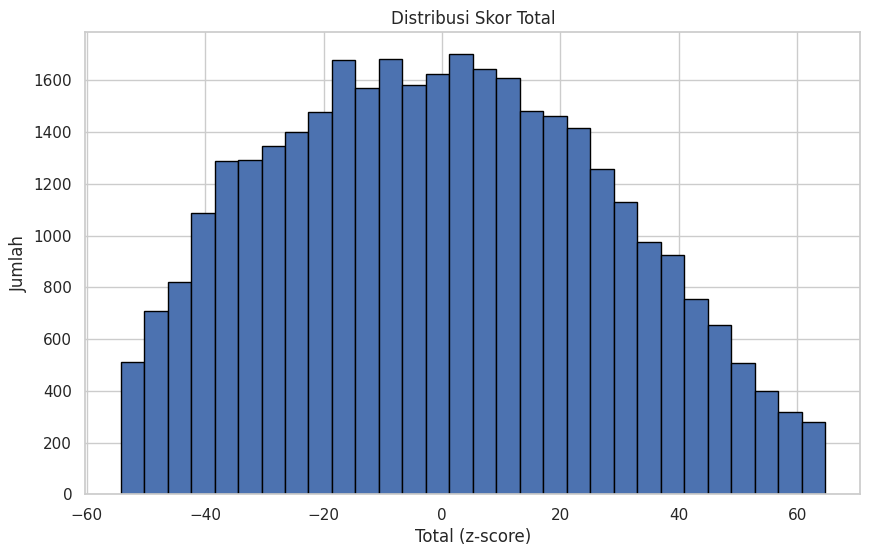

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df_labeled['stress_total'], bins=30, edgecolor='black')
plt.title('Distribusi Skor Total')
plt.xlabel('Total (z-score)')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
bins = [-float('inf'), -22, 22, float('inf')]
labels = ['rendah', 'sedang', 'tinggi']
df_labeled['stress_level'] = pd.cut(df_labeled['stress_total'], bins=bins, labels=labels)
display(df_labeled['stress_total'].head())

,stress_total
0,42.142219
1,9.699097
2,9.368970
3,-8.422243
4,41.174042


In [ ]:
# penerapan adasyn
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_scaled, df_labeled['stress_level'])

print("Sebelum ADASYN:", df_labeled['stress_level'].value_counts())
print("Setelah ADASYN:", pd.Series(y_resampled).value_counts())

Sebelum ADASYN: stress_level
sedang    17622
rendah     8682
tinggi     8279
Name: count, dtype: int64
Setelah ADASYN: stress_level
tinggi    18081
sedang    17622
rendah    17433
Name: count, dtype: int64


In [ ]:
df_adasyn = pd.DataFrame(X_resampled, columns=health_features_cols)
df_adasyn['stress_level'] = y_resampled
display(df_adasyn.head())

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,stress_level
0,1.340379,1.653906,-0.206921,2.002229,1.403513,1.400492,2.051719,1.471134,-0.624170,-1.267216,...,0.322677,1.727632,1.569995,-1.203503,-0.322481,1.545295,0.317996,1.989147,1.301599,tinggi
1,1.340379,-1.053133,-0.206921,1.033821,1.403513,1.400492,1.072657,1.471134,0.314991,-0.385514,...,-0.548382,-0.292817,0.663126,1.436570,-0.322481,-0.425968,-1.497330,0.055521,-0.643194,sedang
2,0.367101,-1.053133,1.732623,-0.902994,1.403513,0.443957,-0.885468,0.516232,-0.624170,1.377891,...,1.193736,0.717408,1.569995,1.436570,1.367783,-0.425968,-0.589667,-0.911292,1.301599,sedang
3,-0.606177,0.751560,-0.206921,-0.902994,0.465242,0.443957,2.051719,-0.438670,0.314991,0.496189,...,1.193736,-1.303042,-1.150611,-0.323479,-1.167613,0.559663,1.225658,1.989147,-0.643194,sedang
4,-0.606177,-0.150787,0.762851,2.002229,1.403513,-0.512579,2.051719,1.471134,1.254151,0.496189,...,1.193736,0.717408,1.569995,0.556545,0.522651,0.559663,1.225658,1.989147,0.329203,tinggi


# ML Engineer

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
# Gabungkan kembali fitur yang sudah discale dengan data untuk profiling
df_processed = pd.concat([df_scaled_features, df_feature[profiling_cols]], axis=1)

# Simpang data ke csv
df_processed.to_csv('data_processed.csv', index=False)

In [ ]:
# Pemisahan fitur untuk pemodelan tanpa adasyn
X_scaled = df_processed[health_features_cols]
print(f"   -> {X_scaled.shape[1]} fitur stres telah dipisahkan untuk pemodelan tanpa adasyn.")

# Pemisahan fitur untuk pemodelan dengan adasyn
X_scaledadasyn = df_adasyn.iloc[:, :-1]
print(f"   -> {X_scaled.shape[1]} fitur stres telah dipisahkan untuk pemodelan setelah adasyn")

   -> 42 fitur stres telah dipisahkan untuk pemodelan tanpa adasyn.
   -> 42 fitur stres telah dipisahkan untuk pemodelan setelah adasyn



Memulai pencarian jumlah cluster (k) yang optimal...


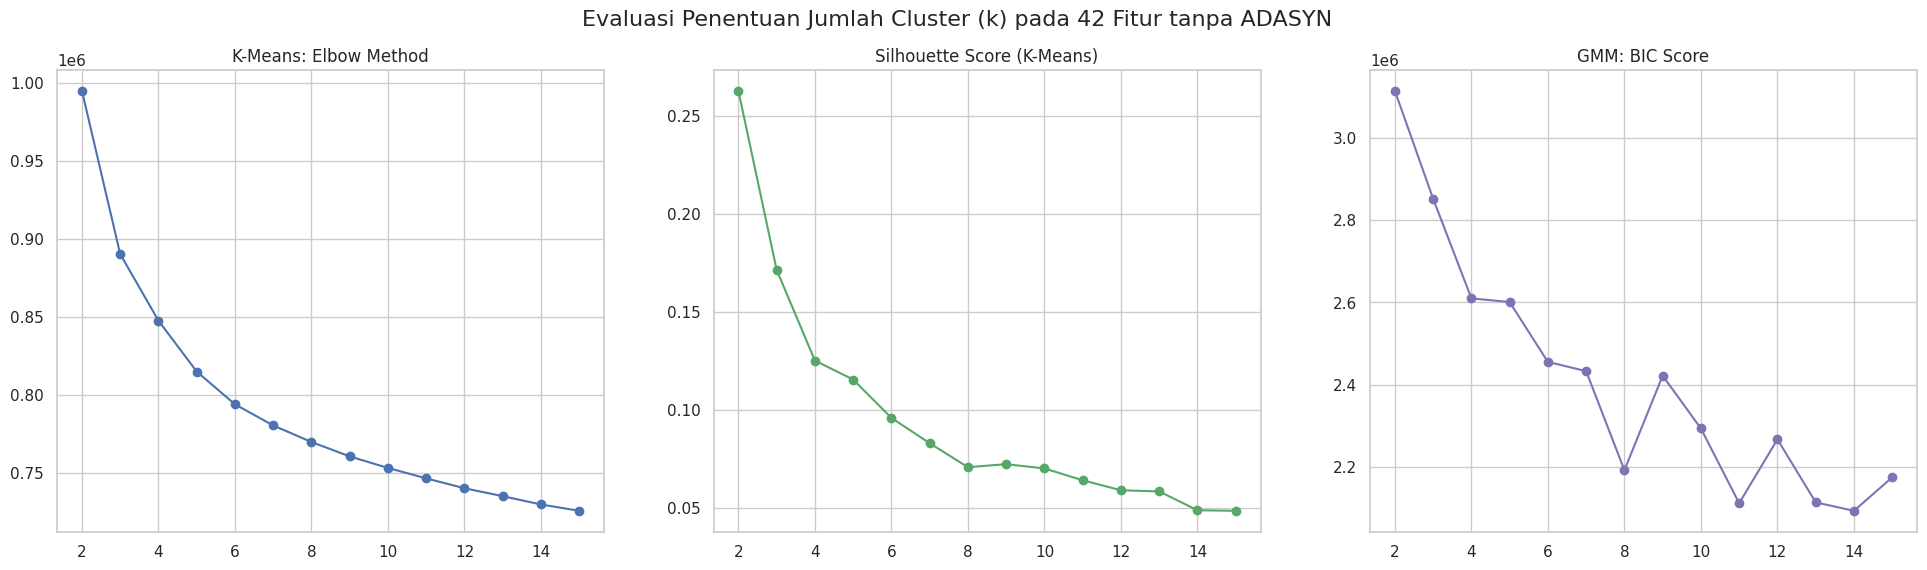


Memulai pencarian jumlah cluster (k) yang optimal...


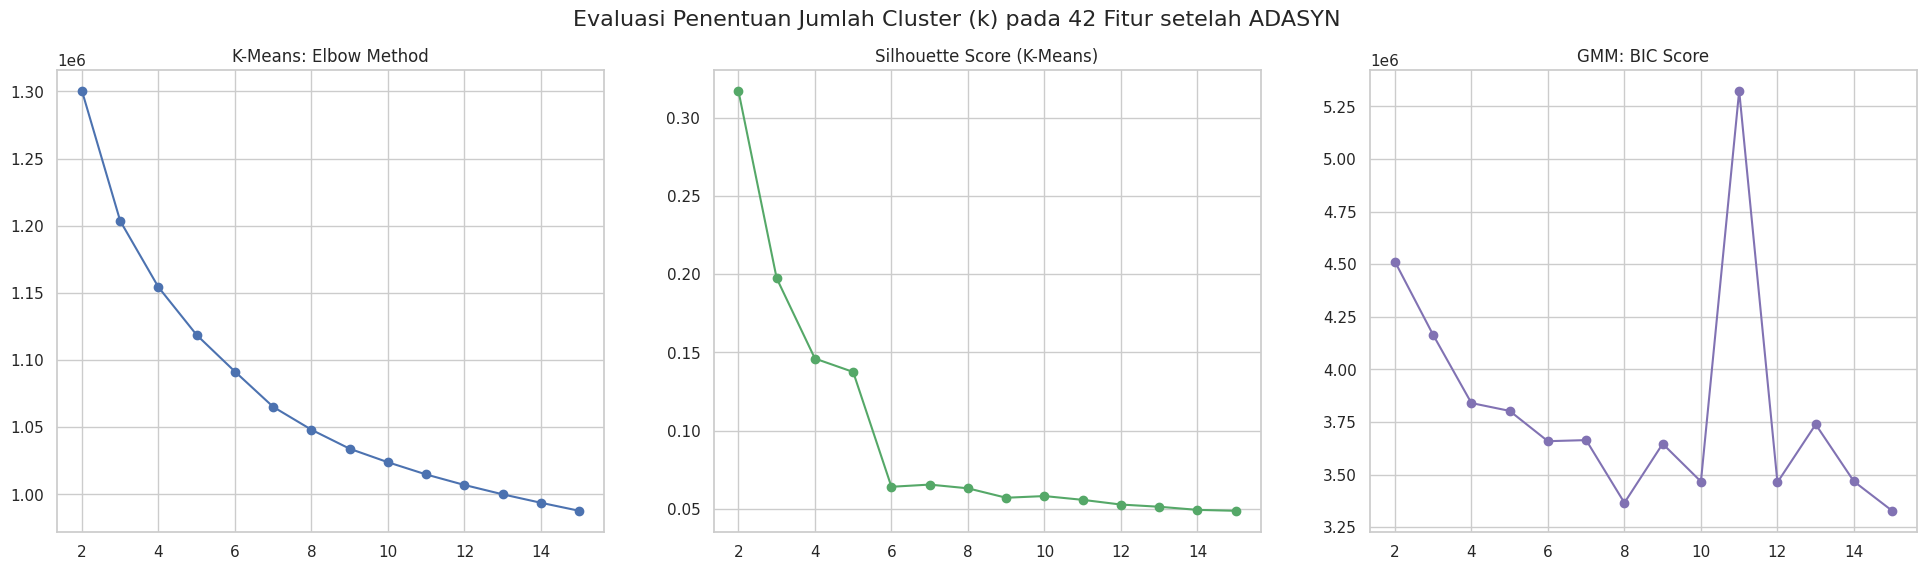

In [ ]:
# Tanpa adasyn
print("\nMemulai pencarian jumlah cluster (k) yang optimal...")
k_range = range(2, 16)
inertia_scores = []
silhouette_scores_kmeans = []
bic_scores_gmm = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_scaled)
    inertia_scores.append(kmeans.inertia_)
    silhouette_scores_kmeans.append(silhouette_score(X_scaled, kmeans.labels_))
    gmm = GaussianMixture(n_components=k, random_state=42).fit(X_scaled)
    bic_scores_gmm.append(gmm.bic(X_scaled))

# Plotting hasil pencarian k
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
axes[0].plot(k_range, inertia_scores, 'bo-'); axes[0].set_title('K-Means: Elbow Method')
axes[1].plot(k_range, silhouette_scores_kmeans, 'go-'); axes[1].set_title('Silhouette Score (K-Means)')
axes[2].plot(k_range, bic_scores_gmm, 'mo-'); axes[2].set_title('GMM: BIC Score')
plt.suptitle('Evaluasi Penentuan Jumlah Cluster (k) pada 42 Fitur tanpa ADASYN', fontsize=16)
plt.show()

# Setelah adasyn
print("\nMemulai pencarian jumlah cluster (k) yang optimal...")
k_range = range(2, 16)
inertia_scores = []
silhouette_scores_kmeans = []
bic_scores_gmm = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_scaledadasyn)
    inertia_scores.append(kmeans.inertia_)
    silhouette_scores_kmeans.append(silhouette_score(X_scaledadasyn, kmeans.labels_))
    gmm = GaussianMixture(n_components=k, random_state=42).fit(X_scaled)
    bic_scores_gmm.append(gmm.bic(X_scaledadasyn))

# Plotting hasil pencarian k
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
axes[0].plot(k_range, inertia_scores, 'bo-'); axes[0].set_title('K-Means: Elbow Method')
axes[1].plot(k_range, silhouette_scores_kmeans, 'go-'); axes[1].set_title('Silhouette Score (K-Means)')
axes[2].plot(k_range, bic_scores_gmm, 'mo-'); axes[2].set_title('GMM: BIC Score')
plt.suptitle('Evaluasi Penentuan Jumlah Cluster (k) pada 42 Fitur setelah ADASYN', fontsize=16)
plt.show()

In [ ]:
# Tanpa ADASYN
K = 4
# Melatih model final K-Means
kmeans_final_noadasyn = KMeans(n_clusters=K, random_state=42, n_init=10)
kmeans_labels_noadasyn = kmeans_final_noadasyn.fit_predict(X_scaled)
print("Model K-Means tanpa ADASYN berhasil dilatih.")

# Melatih model final GMM
gmm_final_noadasyn = GaussianMixture(n_components=K, random_state=42)
gmm_labels_noadasyn = gmm_final_noadasyn.fit_predict(X_scaled)
print("Model GMM tanpa ADASYN berhasil dilatih.")

# Dengan ADASYN
K = 4
# Melatih model final K-Means
kmeans_final_adasyn = KMeans(n_clusters=K, random_state=42, n_init=10)
kmeans_labels_adasyn = kmeans_final_adasyn.fit_predict(X_scaledadasyn)
print("Model K-Means dengan ADASYN berhasil dilatih.")

# Melatih model final GMM
gmm_final_adasyn = GaussianMixture(n_components=K, random_state=42)
gmm_labels_adasyn = gmm_final_adasyn.fit_predict(X_scaledadasyn)
print("Model GMM dengan ADASYN berhasil dilatih.")

Model K-Means tanpa ADASYN berhasil dilatih.
Model GMM tanpa ADASYN berhasil dilatih.
Model K-Means dengan ADASYN berhasil dilatih.
Model GMM dengan ADASYN berhasil dilatih.


In [ ]:
# Memberikan label cluster ke dataset

# tanpa adasyn
df_cluster = df_processed.copy()
df_cluster['kmeans_cluster'] = kmeans_labels_noadasyn
df_cluster['gmm_cluster'] = gmm_labels_noadasyn

print("\nLabel cluster dari K-Means dan GMM (tanpa adasyn) telah ditambahkan ke dataset.")
print("Contoh data dengan label cluster (tanpa adasyn):")
display(df_cluster[['Q1A', 'kmeans_cluster', 'gmm_cluster']].head())

# dengan adasyn

df_clusteradasyn = df_adasyn.copy()
df_clusteradasyn['kmeans_cluster'] = kmeans_labels_adasyn
df_clusteradasyn['gmm_cluster'] = gmm_labels_adasyn

print("\nLabel cluster dari K-Means dan GMM (dengan adasyn) telah ditambahkan ke dataset.")
print("Contoh data dengan label cluster (dengan adasyn):")
display(df_clusteradasyn[['Q1A', 'kmeans_cluster', 'gmm_cluster']].head())


Label cluster dari K-Means dan GMM (tanpa adasyn) telah ditambahkan ke dataset.
Contoh data dengan label cluster (tanpa adasyn):


,Q1A,kmeans_cluster,gmm_cluster
0,1.340379,0,0
1,1.340379,2,1
2,0.367101,2,3
3,-0.606177,3,1
4,-0.606177,0,3



Label cluster dari K-Means dan GMM (dengan adasyn) telah ditambahkan ke dataset.
Contoh data dengan label cluster (dengan adasyn):


,Q1A,kmeans_cluster,gmm_cluster
0,1.340379,1,1
1,1.340379,0,1
2,0.367101,3,2
3,-0.606177,0,1
4,-0.606177,1,2


In [ ]:
# jumlah data per cluster tanpa adasyn
print("Jumlah data per cluster (K-Means tanpa ADASYN):")
print(df_cluster['kmeans_cluster'].value_counts().sort_index())

print("\nJumlah data per cluster (GMM tanpa ADASYN):")
print(df_cluster['gmm_cluster'].value_counts().sort_index())

# jumlah data per cluster dengan adasyn
print("\nJumlah data per cluster (K-Means dengan ADASYN):")
print(df_clusteradasyn['kmeans_cluster'].value_counts().sort_index())

print("\nJumlah data per cluster (GMM dengan ADASYN):")
print(df_clusteradasyn['gmm_cluster'].value_counts().sort_index())

Jumlah data per cluster (K-Means tanpa ADASYN):
kmeans_cluster
0     6865
1     8649
2     8922
3    10147
Name: count, dtype: int64

Jumlah data per cluster (GMM tanpa ADASYN):
gmm_cluster
0     9090
1    12829
2     5669
3     6995
Name: count, dtype: int64

Jumlah data per cluster (K-Means dengan ADASYN):
kmeans_cluster
0    10776
1    12220
2    19904
3    10236
Name: count, dtype: int64

Jumlah data per cluster (GMM dengan ADASYN):
gmm_cluster
0     6322
1    19367
2    12431
3    15016
Name: count, dtype: int64


# Evaluasi dan Visualisasi Hasil Clustering

Evaluasi Model Clustering:
Tanpa Penyeimbangan Data menggunakan ADASYN
[KMeans] Silhouette Score         : 0.125
[KMeans] Calinski-Harabasz Index  : 8228.312
[GMM]    Silhouette Score         : 0.014
[GMM]    Calinski-Harabasz Index  : 3190.464

Dengan Penyeimbangan Data menggunakan ADASYN
[KMeans] Silhouette Score         : 0.146
[KMeans] Calinski-Harabasz Index  : 14022.752
[GMM]    Silhouette Score         : 0.039
[GMM]    Calinski-Harabasz Index  : 8912.908


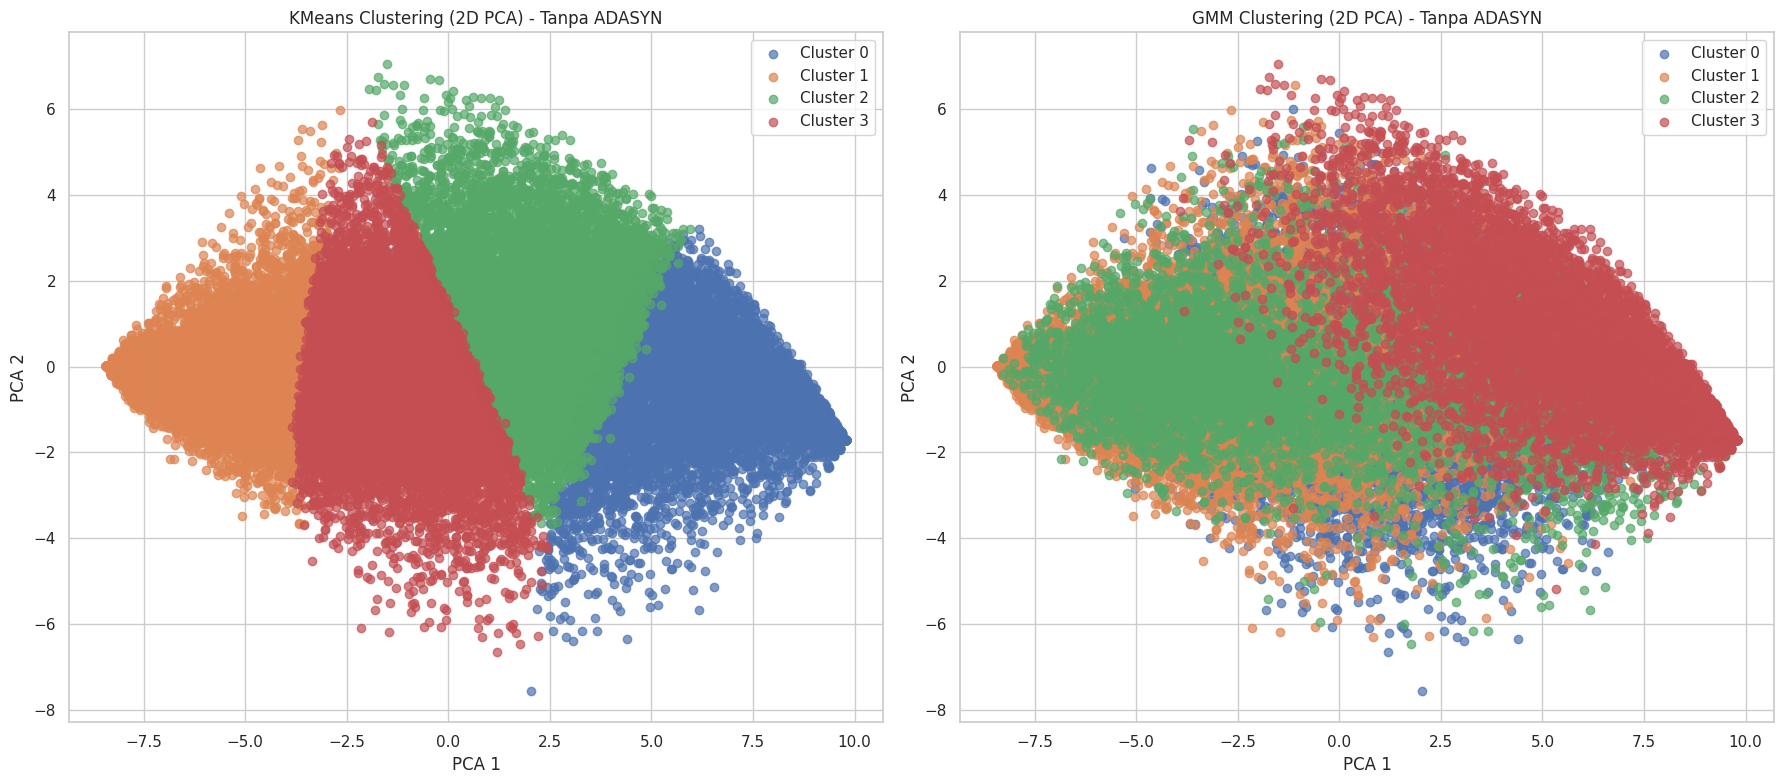

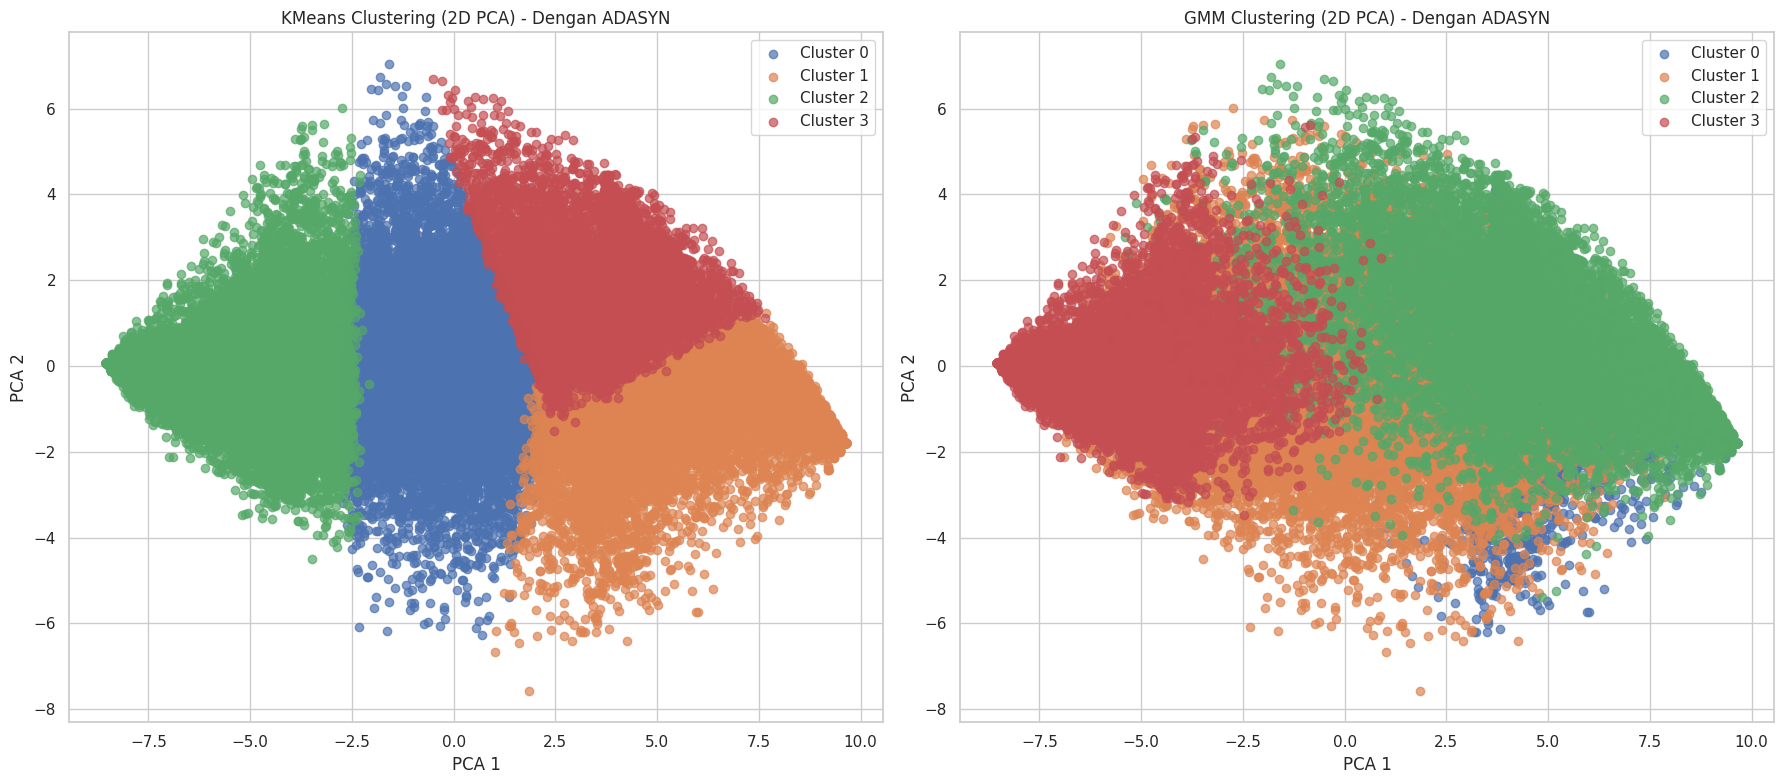

In [ ]:
# evaluasi & visualisasi tanpa adasyn
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA for visualization (separate for before and after ADASYN)
pca_noadasyn = PCA(n_components=2)
X_pca_noadasyn = pca_noadasyn.fit_transform(X_scaled)

pca_adasyn = PCA(n_components=2)
X_pca_adasyn = pca_adasyn.fit_transform(X_scaledadasyn)

# Evaluasi KMeans tanpa adasyn
sil_kmeans_noadasyn = silhouette_score(X_scaled, kmeans_labels_noadasyn)
cal_kmeans_noadasyn = calinski_harabasz_score(X_scaled, kmeans_labels_noadasyn)

# Evaluasi KMeans dengan adasyn
sil_kmeans_adasyn = silhouette_score(X_scaledadasyn, kmeans_labels_adasyn)
cal_kmeans_adasyn = calinski_harabasz_score(X_scaledadasyn, kmeans_labels_adasyn)

# Evaluasi GMM tanpa adasyn
sil_gmm_noadasyn = silhouette_score(X_scaled, gmm_labels_noadasyn)
cal_gmm_noadasyn = calinski_harabasz_score(X_scaled, gmm_labels_noadasyn)

# Evaluasi GMM dengan adasyn
sil_gmm_adasyn = silhouette_score(X_scaledadasyn, gmm_labels_adasyn)
cal_gmm_adasyn = calinski_harabasz_score(X_scaledadasyn, gmm_labels_adasyn)

# Tampilkan hasil evaluasi
print("Evaluasi Model Clustering:")
print("Tanpa Penyeimbangan Data menggunakan ADASYN")
print(f"[KMeans] Silhouette Score         : {sil_kmeans_noadasyn:.3f}")
print(f"[KMeans] Calinski-Harabasz Index  : {cal_kmeans_noadasyn:.3f}")
print(f"[GMM]    Silhouette Score         : {sil_gmm_noadasyn:.3f}")
print(f"[GMM]    Calinski-Harabasz Index  : {cal_gmm_noadasyn:.3f}")

print("\nDengan Penyeimbangan Data menggunakan ADASYN")
print(f"[KMeans] Silhouette Score         : {sil_kmeans_adasyn:.3f}")
print(f"[KMeans] Calinski-Harabasz Index  : {cal_kmeans_adasyn:.3f}")
print(f"[GMM]    Silhouette Score         : {sil_gmm_adasyn:.3f}")
print(f"[GMM]    Calinski-Harabasz Index  : {cal_gmm_adasyn:.3f}")


import numpy as np
import matplotlib.pyplot as plt

# Visualisasi KMeans dan GMM secara berdampingan (tanpa adasyn)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# KMeans (tanpa adasyn)
for label in np.unique(kmeans_labels_noadasyn):
    axes[0].scatter(
        X_pca_noadasyn[kmeans_labels_noadasyn == label, 0],
        X_pca_noadasyn[kmeans_labels_noadasyn == label, 1],
        label=f'Cluster {label}', alpha=0.7
    )
axes[0].set_title("KMeans Clustering (2D PCA) - Tanpa ADASYN")
axes[0].set_xlabel("PCA 1")
axes[0].set_ylabel("PCA 2")
axes[0].legend()
axes[0].grid(True)

# GMM (tanpa adasyn)
for label in np.unique(gmm_labels_noadasyn):
    axes[1].scatter(
        X_pca_noadasyn[gmm_labels_noadasyn == label, 0],
        X_pca_noadasyn[gmm_labels_noadasyn == label, 1],
        label=f'Cluster {label}', alpha=0.7
    )
axes[1].set_title("GMM Clustering (2D PCA) - Tanpa ADASYN")
axes[1].set_xlabel("PCA 1")
axes[1].set_ylabel("PCA 2")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


# Visualisasi KMeans dan GMM secara berdampingan (dengan adasyn)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# KMeans (dengan adasyn)
for label in np.unique(kmeans_labels_adasyn):
    axes[0].scatter(
        X_pca_adasyn[kmeans_labels_adasyn == label, 0],
        X_pca_adasyn[kmeans_labels_adasyn == label, 1],
        label=f'Cluster {label}', alpha=0.7
    )
axes[0].set_title("KMeans Clustering (2D PCA) - Dengan ADASYN")
axes[0].set_xlabel("PCA 1")
axes[0].set_ylabel("PCA 2")
axes[0].legend()
axes[0].grid(True)

# GMM (dengan adasyn)
for label in np.unique(gmm_labels_adasyn):
    axes[1].scatter(
        X_pca_adasyn[gmm_labels_adasyn == label, 0],
        X_pca_adasyn[gmm_labels_adasyn == label, 1],
        label=f'Cluster {label}', alpha=0.7
    )
axes[1].set_title("GMM Clustering (2D PCA) - Dengan ADASYN")
axes[1].set_xlabel("PCA 1")
axes[1].set_ylabel("PCA 2")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()